1. АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ


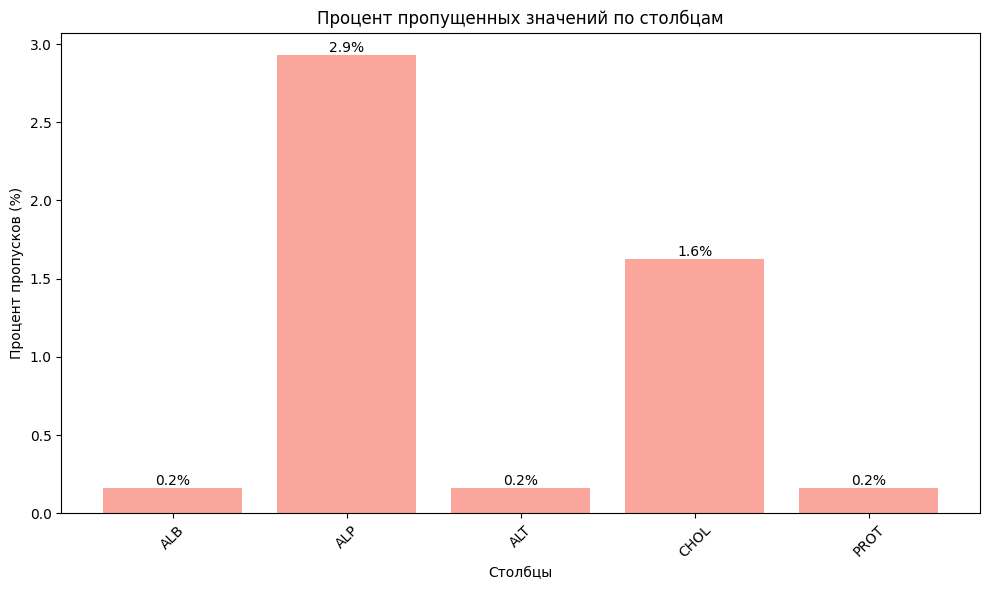


2. РАСПРЕДЕЛЕНИЕ ПО ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (CATEGORY)
Распределение по категориям:
                        Количество  Процент
Category                                   
0=Blood Donor                  533    86.67
3=Cirrhosis                     30     4.88
1=Hepatitis                     24     3.90
2=Fibrosis                      21     3.41
0s=suspect Blood Donor           7     1.14


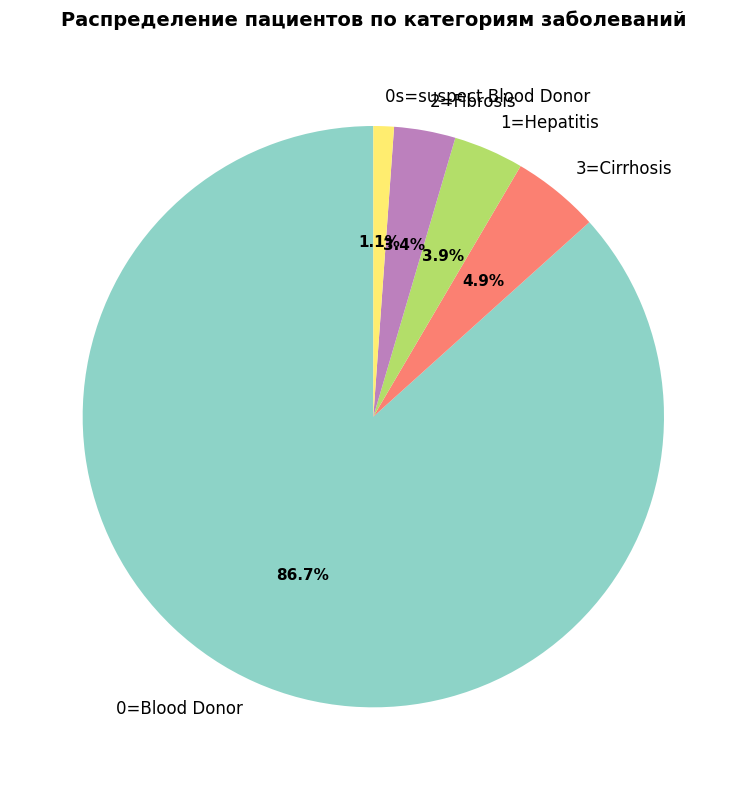


3. МАТРИЦА КОРРЕЛЯЦИИ ПРИЗНАКОВ
Самые высокие корреляции:
AST         Category      0.652524
Category    AST           0.652524
Unnamed: 0  Sex          -0.635232
Sex         Unnamed: 0   -0.635232
ALB         PROT          0.570726
PROT        ALB           0.570726
Category    Unnamed: 0    0.524854
Unnamed: 0  Category      0.524854
Category    BIL           0.520561
BIL         Category      0.520561
dtype: float64


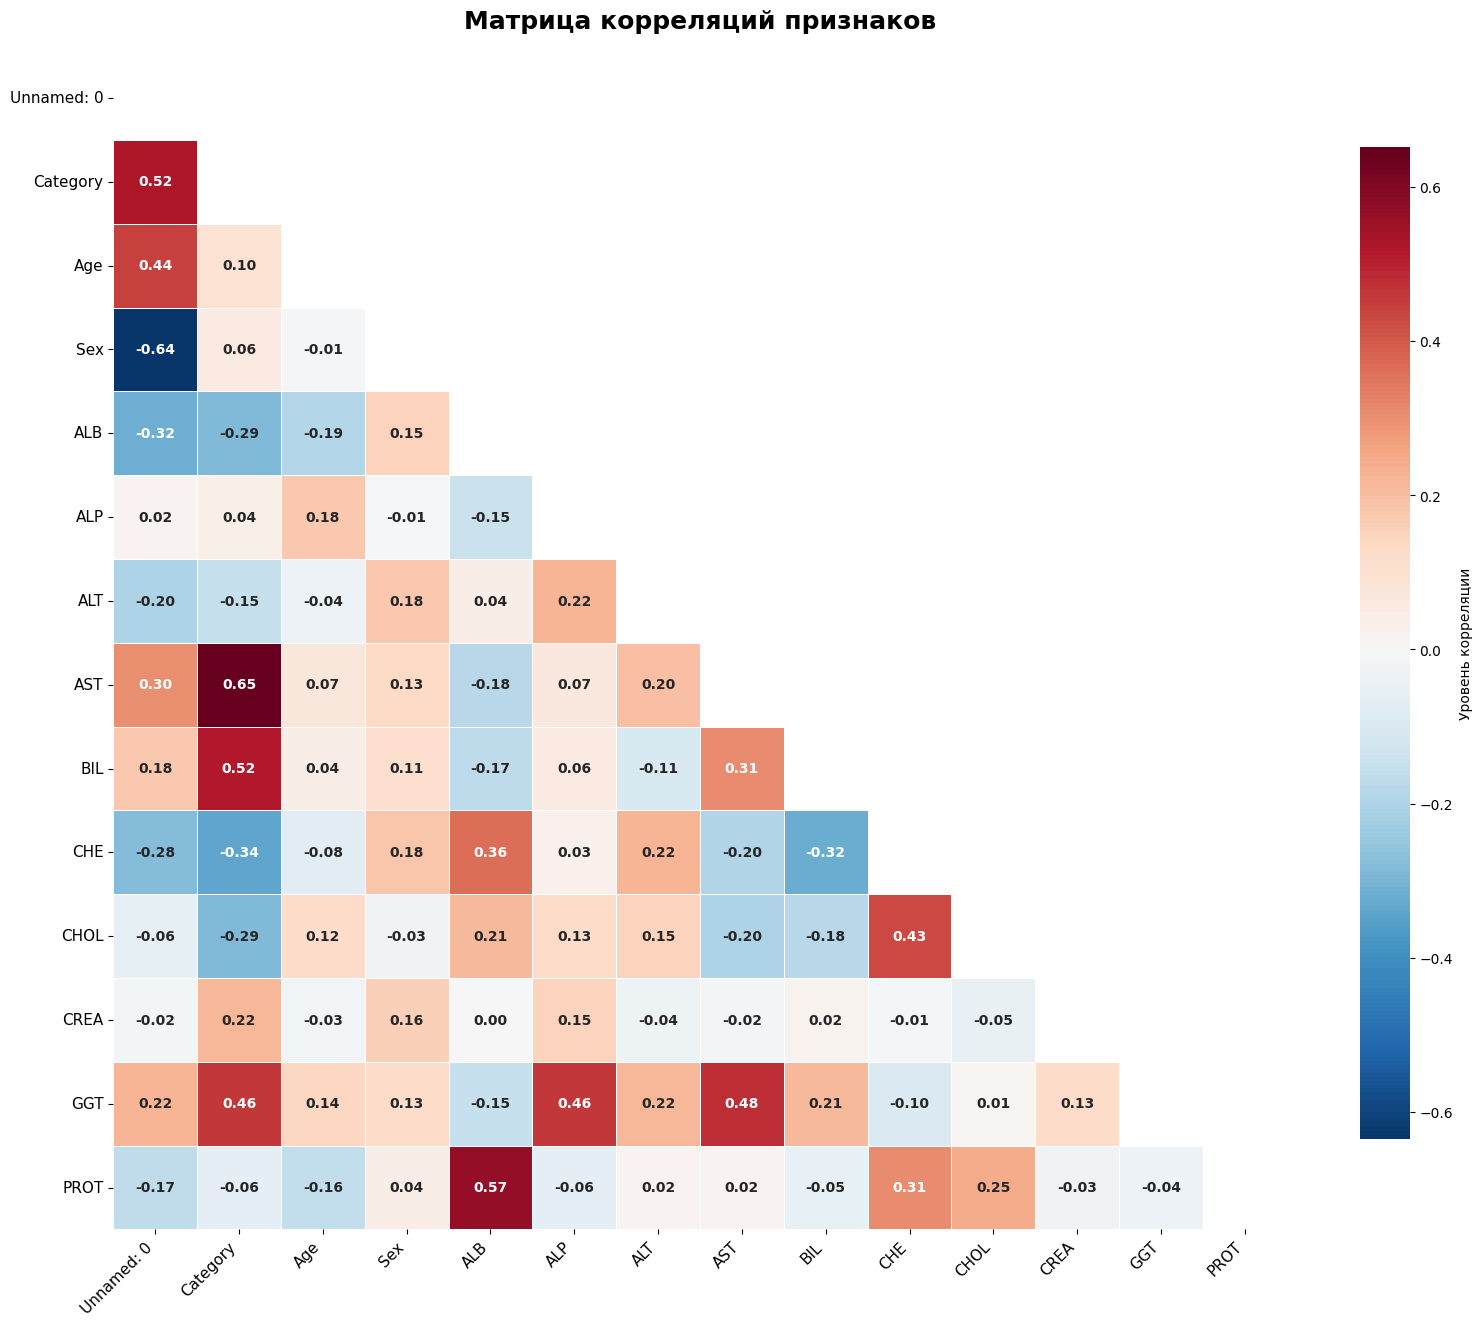


4. РАСПРЕДЕЛЕНИЕ ПО ЦЕЛЕВОЙ ПЕРЕМЕННОЙ В ЗАВИСИМОСТИ ОТ ПОЛА
Кросс-таблица (количество):
Sex                       f    m  All
Category                             
0=Blood Donor           215  318  533
0s=suspect Blood Donor    1    6    7
1=Hepatitis               4   20   24
2=Fibrosis                8   13   21
3=Cirrhosis              10   20   30
All                     238  377  615

Кросс-таблица (проценты):
Sex                         f      m
Category                            
0=Blood Donor           34.96  51.71
0s=suspect Blood Donor   0.16   0.98
1=Hepatitis              0.65   3.25
2=Fibrosis               1.30   2.11
3=Cirrhosis              1.63   3.25


<Figure size 1200x600 with 0 Axes>

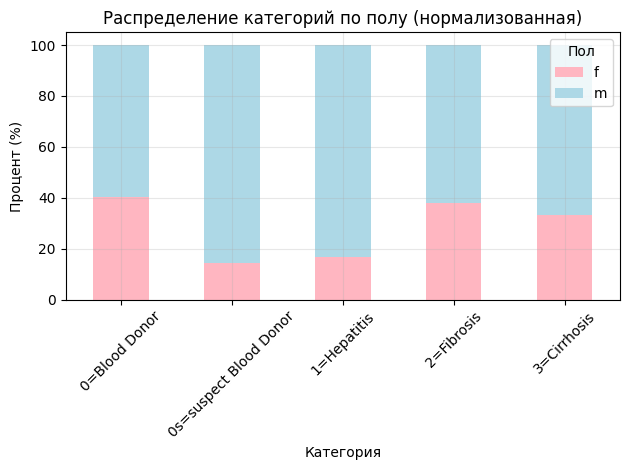

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/hcvdat0.csv')
df_clean = df.dropna()

# 1. АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
print("1. АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")

missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Количество пропусков': missing_data,
    'Процент пропусков': missing_percent
})

# Визуализация пропущенных значений
missing_plot_data = missing_info[missing_info['Количество пропусков'] > 0]
if not missing_plot_data.empty:
    plt.figure(figsize=(10, 6))
    bars = plt.bar(missing_plot_data.index, missing_plot_data['Процент пропусков'],
                  color='salmon', alpha=0.7)
    plt.title('Процент пропущенных значений по столбцам')
    plt.xlabel('Столбцы')
    plt.ylabel('Процент пропусков (%)')
    plt.xticks(rotation=45)

    # Добавляем значения на столбцы
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
else:
    print("Пропущенных значений нет")


# 2. РАСПРЕДЕЛЕНИЕ ПО ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (CATEGORY)
print("\n" + "=" * 50)
print("2. РАСПРЕДЕЛЕНИЕ ПО ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (CATEGORY)")
print("=" * 50)

# Визуализация распределения по категориям круговой диаграммой
if 'Category' in df.columns:
    category_counts = df['Category'].value_counts()
    category_percent = df['Category'].value_counts(normalize=True) * 100

    # Создаем DataFrame с распределением
    category_dist = pd.DataFrame({
        'Количество': category_counts,
        'Процент': category_percent.round(2)
    })

    print("Распределение по категориям:")
    print(category_dist)

    # Круговая диаграмма
    plt.figure(figsize=(10, 8))

    colors = plt.cm.Set3(np.linspace(0, 1, len(category_counts)))
    wedges, texts, autotexts = plt.pie(category_counts.values,
                                      labels=category_counts.index,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      colors=colors,
                                      textprops={'fontsize': 12})

    # Увеличиваем размер процентов
    for autotext in autotexts:
        autotext.set_fontsize(11)
        autotext.set_fontweight('bold')

    plt.title('Распределение пациентов по категориям заболеваний',
              fontsize=14, fontweight='bold', pad=20)

    plt.tight_layout()
    plt.show()

# 3. МАТРИЦА КОРРЕЛЯЦИИ ПРИЗНАКОВ
print("\n" + "=" * 50)
print("3. МАТРИЦА КОРРЕЛЯЦИИ ПРИЗНАКОВ")
print("=" * 50)

# Создаем копию датафрейма для кодирования категориальных признаков
df_encoded = df_clean.copy()
le = LabelEncoder()

# Кодируем категориальные признаки
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col in df_encoded.columns:
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Вычисляем матрицу корреляций
correlation_matrix = df_encoded.corr()

# Находим самые высокие корреляции (исключая диагональ)
corr_pairs = correlation_matrix.unstack().sort_values(key=abs, ascending=False)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

print("Самые высокие корреляции:")
print(corr_pairs.head(10))

# Визуализация матрицы корреляций
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdBu_r',
            center=0,
            fmt='.2f',
            square=True,
            cbar_kws={'shrink': 0.75, 'label': 'Уровень корреляции'},
            annot_kws={'size': 10, 'weight': 'bold'},
            linewidths=0.5,
            linecolor='white')

plt.title('Матрица корреляций признаков', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

# 4. РАСПРЕДЕЛЕНИЕ ПО ЦЕЛЕВОЙ ПЕРЕМЕННОЙ В ЗАВИСИМОСТИ ОТ ПОЛА
print("\n" + "=" * 50)
print("4. РАСПРЕДЕЛЕНИЕ ПО ЦЕЛЕВОЙ ПЕРЕМЕННОЙ В ЗАВИСИМОСТИ ОТ ПОЛА")
print("=" * 50)

if 'Category' in df.columns and 'Sex' in df.columns:
    # Создаем кросс-таблицу
    cross_tab = pd.crosstab(df['Category'], df['Sex'], margins=True)
    cross_tab_percent = pd.crosstab(df['Category'], df['Sex'], normalize='all') * 100

    print("Кросс-таблица (количество):")
    print(cross_tab)
    print("\nКросс-таблица (проценты):")
    print(cross_tab_percent.round(2))

    # Визуализация
    plt.figure(figsize=(12, 6))

    cross_tab_norm = pd.crosstab(df['Category'], df['Sex'], normalize='index') * 100
    cross_tab_norm.plot(kind='bar', stacked=True, color=['lightpink', 'lightblue'])
    plt.title('Распределение категорий по полу (нормализованная)')
    plt.xlabel('Категория')
    plt.ylabel('Процент (%)')
    plt.legend(title='Пол')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Столбцы 'Category' и/или 'Sex' не найдены")

In [3]:
df = df_encoded.drop("Category", axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 589 entries, 0 to 612
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  589 non-null    int64  
 1   Age         589 non-null    int64  
 2   Sex         589 non-null    int64  
 3   ALB         589 non-null    float64
 4   ALP         589 non-null    float64
 5   ALT         589 non-null    float64
 6   AST         589 non-null    float64
 7   BIL         589 non-null    float64
 8   CHE         589 non-null    float64
 9   CHOL        589 non-null    float64
 10  CREA        589 non-null    float64
 11  GGT         589 non-null    float64
 12  PROT        589 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 64.4 KB
None


Обнаружено аномалий: 30 из 589
Процент аномалий: 5.09%


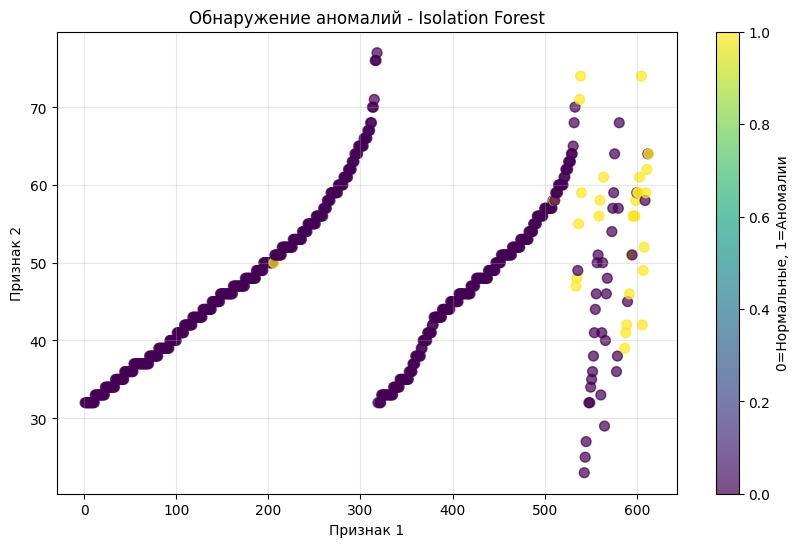

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import IsolationForest

# Используем все данные для обнаружения аномалий
X = df.values

# Создаем и обучаем модель
clf = IsolationForest(contamination=0.05, random_state=42)
y_pred = clf.fit_predict(X)

# Преобразуем метки
y_pred_binary = np.where(y_pred == -1, 1, 0)

print(f"Обнаружено аномалий: {np.sum(y_pred_binary)} из {len(y_pred_binary)}")
print(f"Процент аномалий: {np.sum(y_pred_binary) / len(y_pred_binary) * 100:.2f}%")

# Простая визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1],
                     c=y_pred_binary,
                     cmap='viridis',
                     alpha=0.7,
                     s=50)

plt.colorbar(label='0=Нормальные, 1=Аномалии')
plt.title('Обнаружение аномалий - Isolation Forest')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid(True, alpha=0.3)
plt.show()

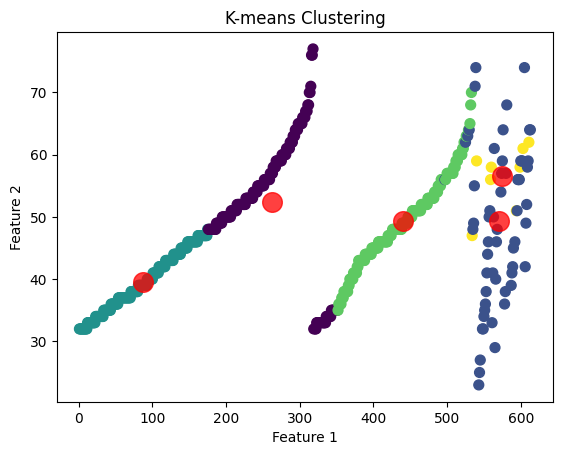

In [5]:
from sklearn.cluster import KMeans

X = df.values

# Инициализируем модель KMeans с 5 кластерами
kmeans = KMeans(n_clusters=5, random_state=42)

# Обучаем модель на масштабированных данных
kmeans.fit(X)

# Предсказываем кластеры
y_kmeans = kmeans.predict(X)

# Визуализируем результаты
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Отображаем центры кластеров
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Number of clusters: 2, Silhouette Score: 0.54, Davies-Bouldin Index: 0.66, Inertia: 9269631.37, Calinski-Harabasz Index: 846.62


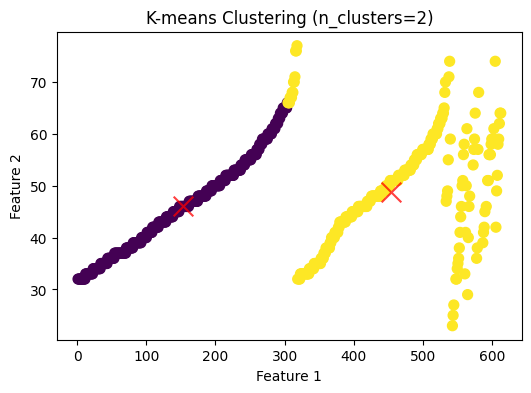

Number of clusters: 3, Silhouette Score: 0.44, Davies-Bouldin Index: 0.80, Inertia: 6662719.41, Calinski-Harabasz Index: 702.57


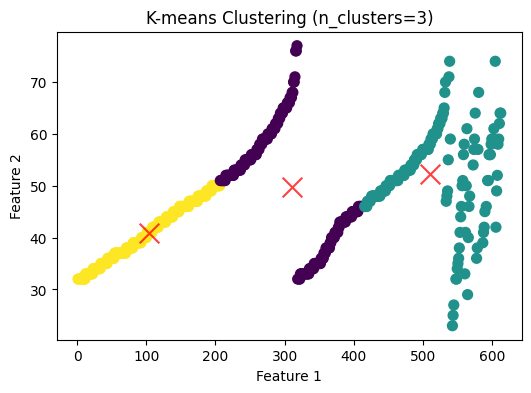

Number of clusters: 4, Silhouette Score: 0.44, Davies-Bouldin Index: 1.01, Inertia: 5360549.32, Calinski-Harabasz Index: 628.54


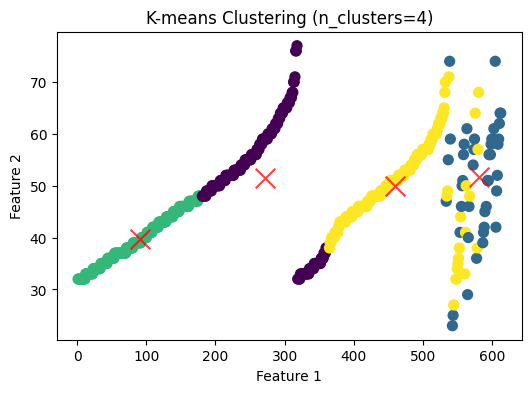

Number of clusters: 5, Silhouette Score: 0.43, Davies-Bouldin Index: 0.93, Inertia: 4526263.92, Calinski-Harabasz Index: 584.25


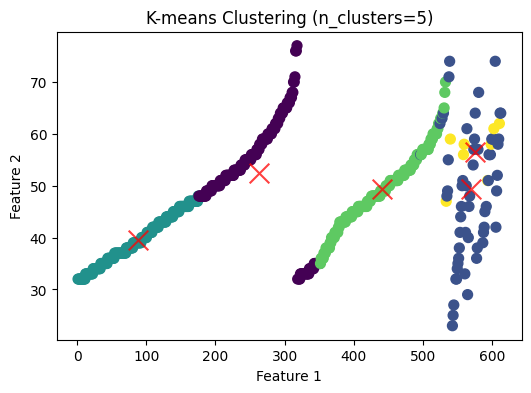

Number of clusters: 6, Silhouette Score: 0.39, Davies-Bouldin Index: 0.97, Inertia: 3887998.79, Calinski-Harabasz Index: 562.34


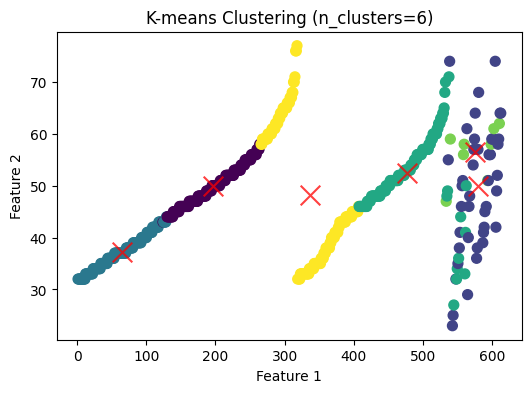

Number of clusters: 7, Silhouette Score: 0.36, Davies-Bouldin Index: 1.06, Inertia: 3541505.51, Calinski-Harabasz Index: 523.07


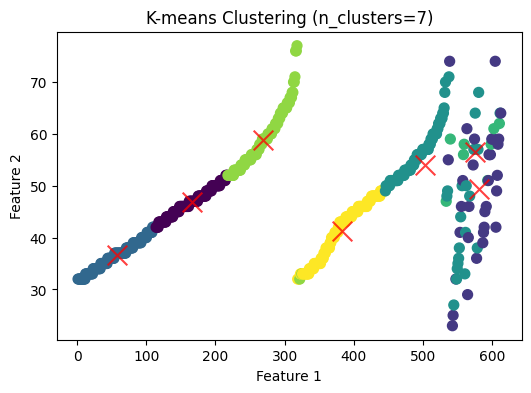

Number of clusters: 8, Silhouette Score: 0.37, Davies-Bouldin Index: 0.89, Inertia: 2422355.08, Calinski-Harabasz Index: 692.71


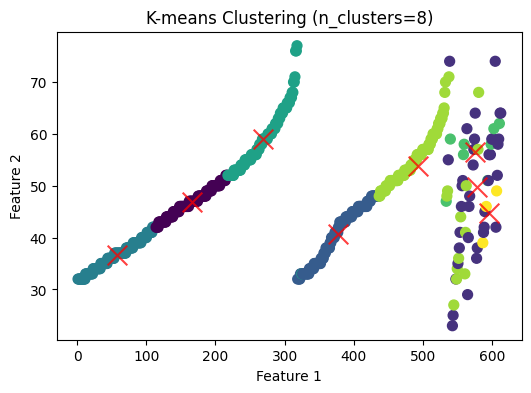

Number of clusters: 9, Silhouette Score: 0.31, Davies-Bouldin Index: 0.95, Inertia: 2283607.24, Calinski-Harabasz Index: 646.24


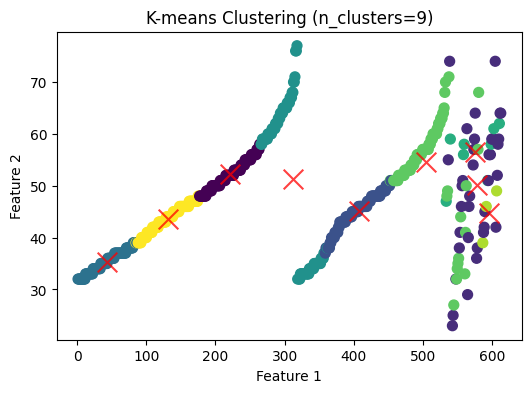

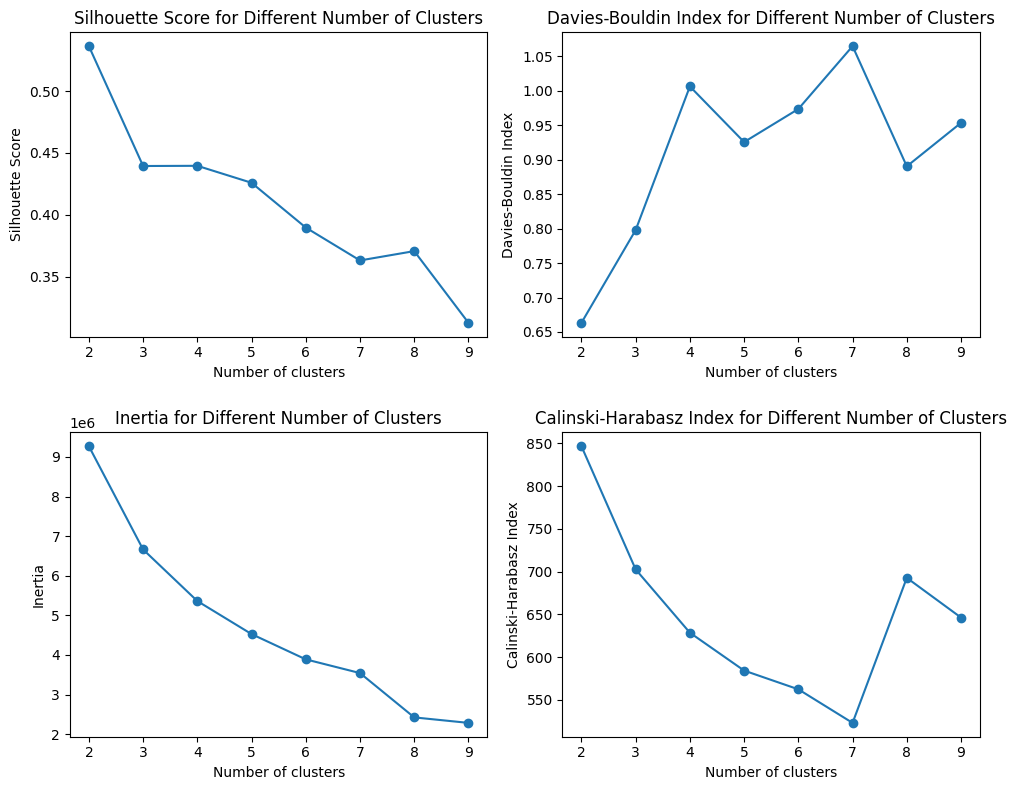

In [6]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = df.values

# Списки для хранения значений метрик
silhouette_scores = []
davies_bouldin_scores = []
inertia_scores = []
calinski_harabasz_scores = []

# Проверка качества кластеризации для разного числа кластеров
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    # Оценка метрик
    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    inertia = kmeans.inertia_
    calinski_harabasz = calinski_harabasz_score(X, labels)

    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin)
    inertia_scores.append(inertia)
    calinski_harabasz_scores.append(calinski_harabasz)

    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.2f}, Davies-Bouldin Index: {davies_bouldin:.2f}, Inertia: {inertia:.2f}, Calinski-Harabasz Index: {calinski_harabasz:.2f}")

    # Визуализация кластеров
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

    # Отображение центров кластеров
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')

    plt.title(f"K-means Clustering (n_clusters={n_clusters})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Визуализация изменения метрик
plt.figure(figsize=(10, 8))

# Silhouette Score (Индекс Силуэт)
plt.subplot(2, 2, 1)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters')

# Davies-Bouldin Index (Индекс Дэвиса-Болдуина)
plt.subplot(2, 2, 2)
plt.plot(range(2, 10), davies_bouldin_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Number of Clusters')

# Inertia (Сумма внутрикластерных расстояний)
plt.subplot(2, 2, 3)
plt.plot(range(2, 10), inertia_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia for Different Number of Clusters')

# Calinski-Harabasz Index (Коэффициент Кэллински-Харабаза)
plt.subplot(2, 2, 4)
plt.plot(range(2, 10), calinski_harabasz_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Different Number of Clusters')

plt.tight_layout()
plt.show()

Кластеры: 2 | ARI: 0.618 | NMI: 0.459 | V-measure: 0.459
Кластеры: 3 | ARI: -0.026 | NMI: 0.075 | V-measure: 0.075
Кластеры: 4 | ARI: 0.063 | NMI: 0.159 | V-measure: 0.159
Кластеры: 5 | ARI: 0.066 | NMI: 0.167 | V-measure: 0.167
Кластеры: 6 | ARI: 0.060 | NMI: 0.173 | V-measure: 0.173
Кластеры: 7 | ARI: 0.099 | NMI: 0.222 | V-measure: 0.222
Кластеры: 8 | ARI: 0.101 | NMI: 0.278 | V-measure: 0.278
Кластеры: 9 | ARI: 0.076 | NMI: 0.273 | V-measure: 0.273


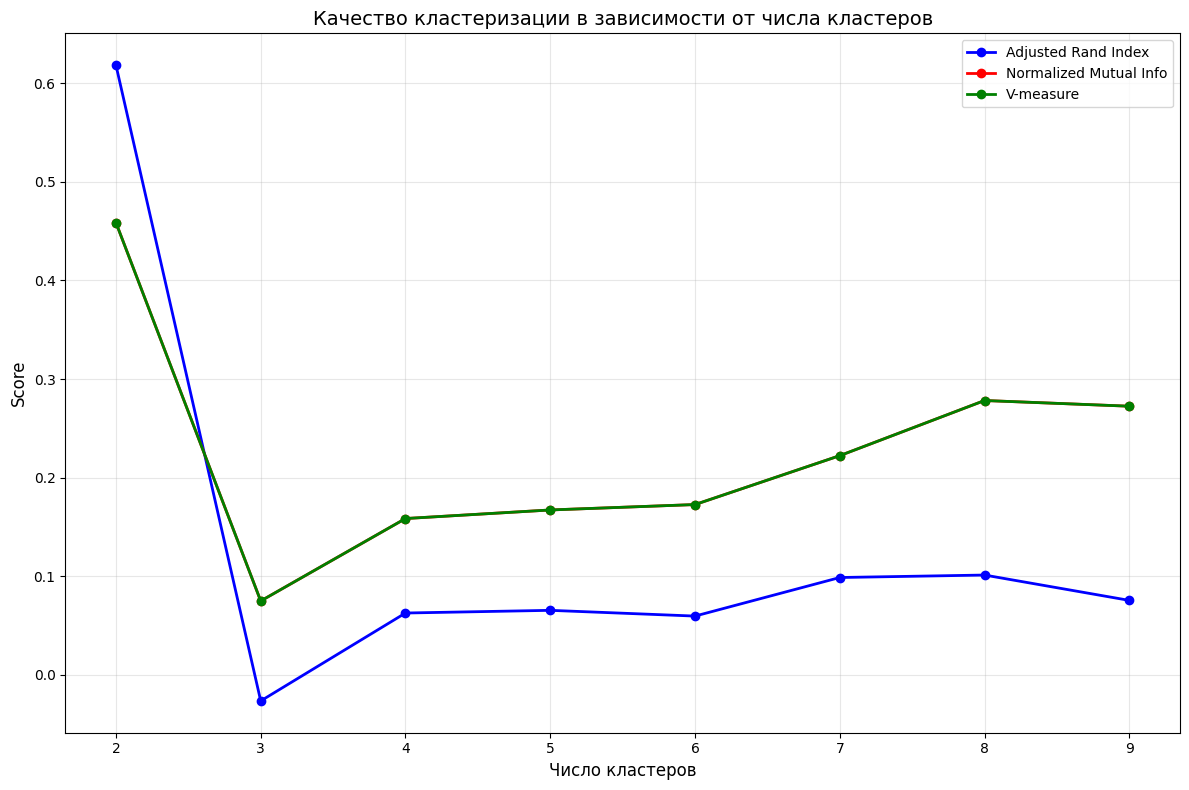


Оптимальное число кластеров:
По Adjusted Rand Index: 2
По Normalized Mutual Info: 2


In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, completeness_score, homogeneity_score, v_measure_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

X = df.values
true_labels = df_encoded['Category']

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ari_scores = []
nmi_scores = []
completeness_scores = []
homogeneity_scores = []
v_measure_scores = []

for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    predicted_labels = kmeans.fit_predict(X_scaled)

    # Вычисление внешних метрик
    ari = adjusted_rand_score(true_labels, predicted_labels)
    nmi = normalized_mutual_info_score(true_labels, predicted_labels)
    completeness = completeness_score(true_labels, predicted_labels)
    homogeneity = homogeneity_score(true_labels, predicted_labels)
    v_measure = v_measure_score(true_labels, predicted_labels)

    ari_scores.append(ari)
    nmi_scores.append(nmi)
    completeness_scores.append(completeness)
    homogeneity_scores.append(homogeneity)
    v_measure_scores.append(v_measure)

    print(f"Кластеры: {n_clusters} | ARI: {ari:.3f} | NMI: {nmi:.3f} | V-measure: {v_measure:.3f}")

# 5. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

metrics = [ari_scores, nmi_scores, v_measure_scores]
metric_names = ['Adjusted Rand Index', 'Normalized Mutual Info', 'V-measure']
colors = ['blue', 'red', 'green']

for i, (metric, name, color) in enumerate(zip(metrics, metric_names, colors)):
    plt.plot(range(2, 10), metric, marker='o', label=name, color=color, linewidth=2)

plt.title('Качество кластеризации в зависимости от числа кластеров', fontsize=14)
plt.xlabel('Число кластеров', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(2, 10))
plt.tight_layout()
plt.show()

# 6. НАХОЖДЕНИЕ ОПТИМАЛЬНОГО ЧИСЛА КЛАСТЕРОВ
best_n_clusters_ari = np.argmax(ari_scores) + 2
best_n_clusters_nmi = np.argmax(nmi_scores) + 2

print(f"\nОптимальное число кластеров:")
print(f"По Adjusted Rand Index: {best_n_clusters_ari}")
print(f"По Normalized Mutual Info: {best_n_clusters_nmi}")

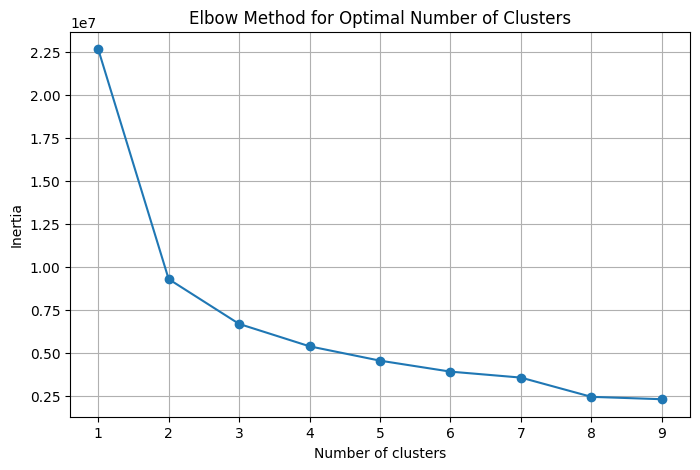

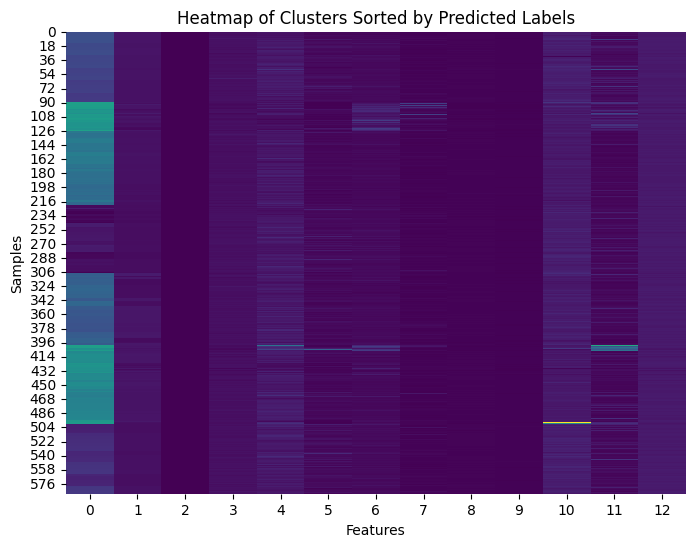

Average Silhouette Score: 0.31


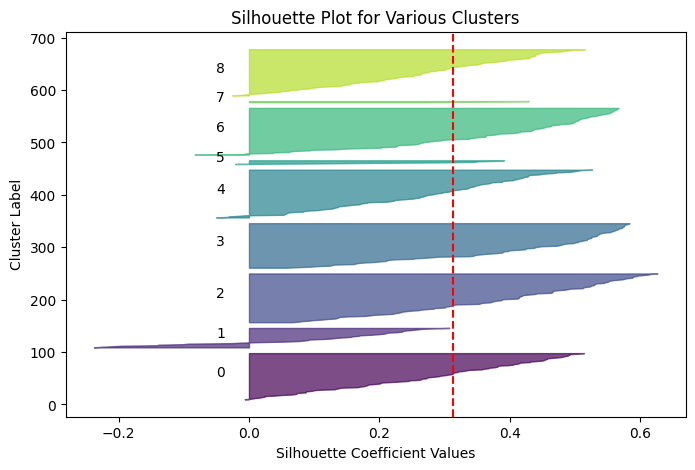

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score

X = df.values

inertia_scores = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Кластеризация с использованием k-средних
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
predicted_labels = kmeans.fit_predict(X)

# Карта тепла (Heatmap) для визуализации сходства объектов внутри кластеров
plt.figure(figsize=(8, 6))
sns.heatmap(X[np.argsort(predicted_labels)], cmap='viridis', cbar=False)
plt.title('Heatmap of Clusters Sorted by Predicted Labels')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

# Диаграмма Силуэт (Silhouette Plot)
silhouette_avg = silhouette_score(X, predicted_labels)
print(f"Average Silhouette Score: {silhouette_avg:.2f}")

sample_silhouette_values = silhouette_samples(X, predicted_labels)

plt.figure(figsize=(8, 5))
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[predicted_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

plt.title("Silhouette Plot for Various Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

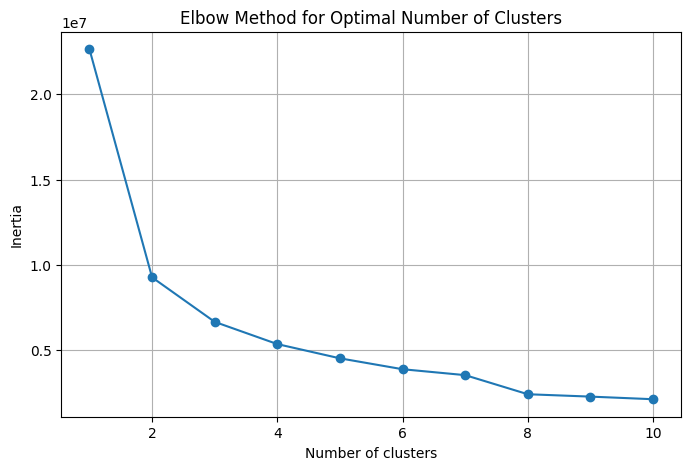

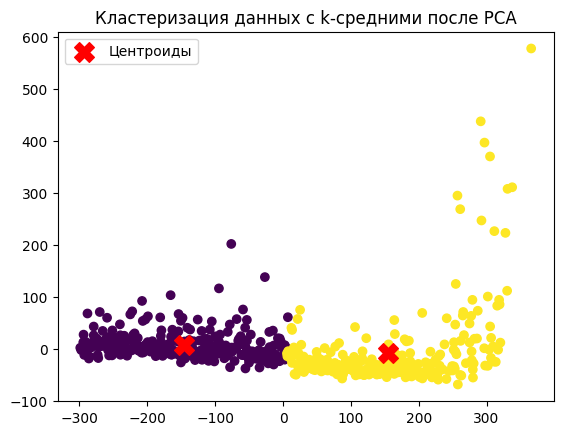

Силуэтовская оценка: 0.54
Индекс Дэвиса-Болдуина: 0.66
Индекс Калински-Харабаса: 846.62


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

X = df.values

# Метод локтя (Elbow Method) для выбора оптимального количества кластеров
inertia_scores = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Выбор количества кластеров (k) на основе метода локтя
k = 2

# Кластеризация с использованием k-средних
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Преобразование центров кластеров с использованием PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Визуализация кластеров после снижения размерности
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', label='Центроиды', marker='X')
plt.title('Кластеризация данных с k-средними после PCA')
plt.legend()
plt.show()

# Вычисление метрик качества
silhouette_avg = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")


Количество кластеров: 21
Кластер 1 - Центр: [34.   35.    1.   37.5  69.8  37.1  25.    7.8  11.66  5.73 84.   27.3
 71.  ], Количество объектов: 67
Кластер 2 - Центр: [97.   40.    1.   39.1  66.5  33.3  32.9  14.8   7.87  4.91 88.   18.5
 68.8 ], Количество объектов: 51
Кластер 3 - Центр: [145.    45.     1.    46.4   77.    60.3   32.9    8.8    9.38   6.27
  85.    81.1   75.5 ], Количество объектов: 17
Кластер 4 - Центр: [152.    46.     1.    41.8   65.6   30.5   28.2    6.1   10.68   4.72
  82.    24.8   65.  ], Количество объектов: 46
Кластер 5 - Центр: [212.    51.     1.    45.9   66.7   31.8   28.1    9.    10.08   5.61
  85.    36.2   73.  ], Количество объектов: 64
Кластер 6 - Центр: [282.    61.     1.    45.9   73.3   17.1   24.3    4.8   10.01   4.95
  88.    23.5   70.8 ], Количество объектов: 64
Кластер 7 - Центр: [317.    76.     1.    38.    97.1   28.6   33.1   14.1    4.83   5.56
  90.   117.6   73.8 ], Количество объектов: 8
Кластер 8 - Центр: [353.    36.     0.

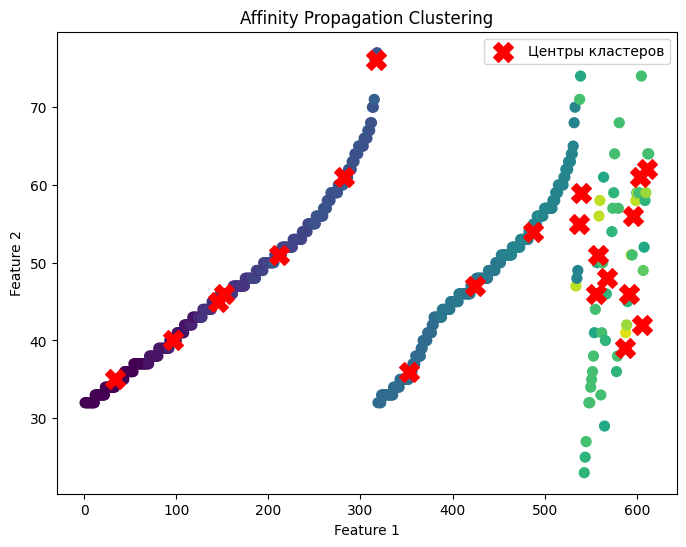

Силуэтовская оценка: 0.29
Индекс Дэвиса-Болдуина: 0.83
Индекс Калински-Харабаса: 549.50


In [11]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

X = df.values
# Создание модели Affinity Propagation
af = AffinityPropagation(random_state=42) # preference

# Обучение модели
af.fit(X)

# Получение кластеров и их центров
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

# Вывод результатов
n_clusters_ = len(cluster_centers_indices)
print(f"Количество кластеров: {n_clusters_}")

for i in range(n_clusters_):
    cluster_center = X[cluster_centers_indices[i]]
    cluster_objects = X[labels == i]
    print(f"Кластер {i + 1} - Центр: {cluster_center}, Количество объектов: {len(cluster_objects)}")

# Визуализация кластеров с использованием первых двух признаков
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50)
plt.scatter(X[cluster_centers_indices, 0], X[cluster_centers_indices, 1], c='red', marker='X', s=200, label='Центры кластеров')
plt.title('Affinity Propagation Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Вычисление метрик качества
silhouette_avg = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")


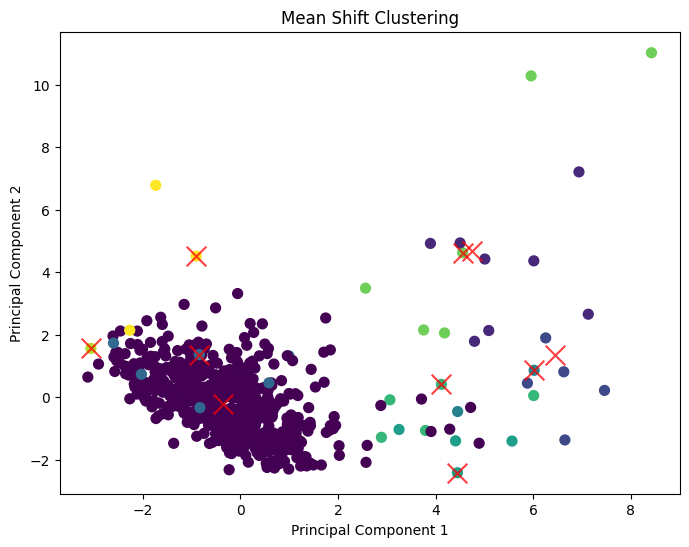

Силуэтовская оценка: 0.23
Индекс Дэвиса-Болдуина: 1.60
Индекс Калински-Харабаса: 27.14


In [23]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X = df.values
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Оценка ширины полосы пропускания (bandwidth) для алгоритма MeanShift
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=500)

# Кластеризация с использованием алгоритма со средним сдвигом
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(X_scaled)
predicted_labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация исходных данных
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, s=50, cmap='viridis')
cluster_centers_pca = pca.transform(cluster_centers)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title("Mean Shift Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Вычисление метрик качества
silhouette_avg = silhouette_score(X_scaled, predicted_labels)
davies_bouldin = davies_bouldin_score(X_scaled, predicted_labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, predicted_labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")

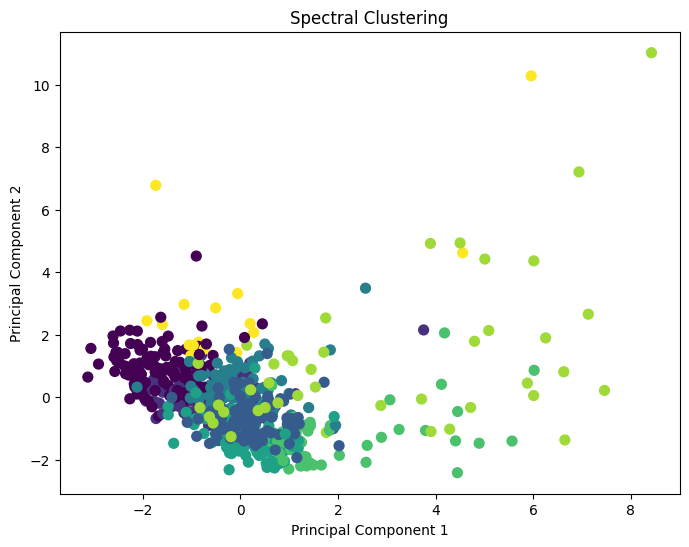

Силуэтовская оценка: 0.13
Индекс Дэвиса-Болдуина: 1.71
Индекс Калински-Харабаса: 51.80


In [24]:
from sklearn.cluster import MeanShift, estimate_bandwidth, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

X = df.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение спектральной кластеризации
spectral = SpectralClustering(affinity='nearest_neighbors', random_state=42)
predicted_labels = spectral.fit_predict(X_scaled)

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация кластеров после спектральной кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, s=50, cmap='viridis')
plt.title("Spectral Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Вычисление метрик качества
silhouette_avg = silhouette_score(X_scaled, predicted_labels)
davies_bouldin = davies_bouldin_score(X_scaled, predicted_labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, predicted_labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")


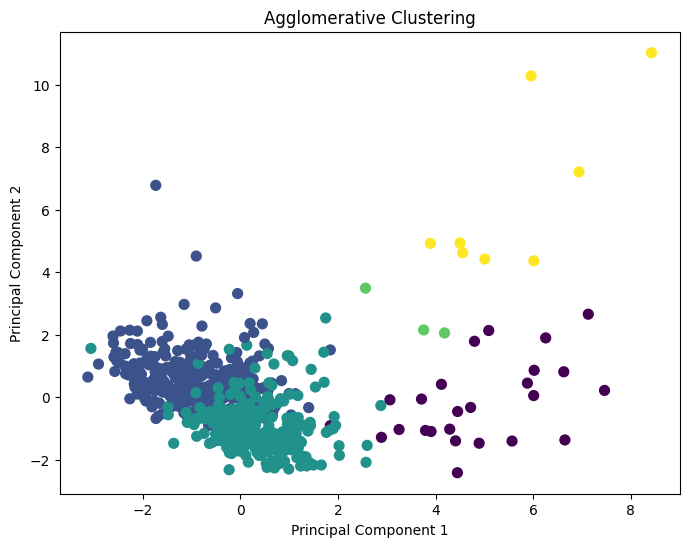

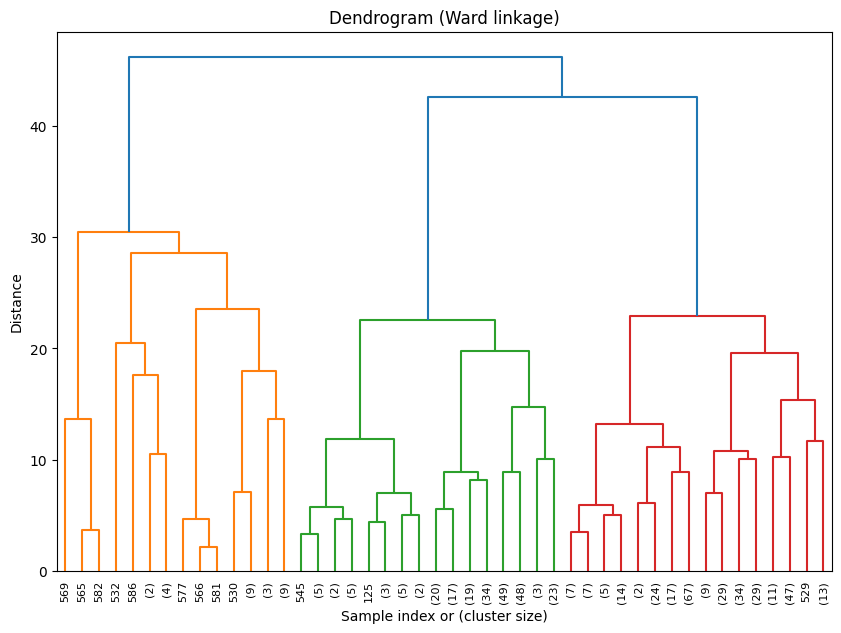

Силуэтовская оценка: 0.22
Индекс Дэвиса-Болдуина: 1.48
Индекс Калински-Харабаса: 86.68


In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

X = df.values
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение агломеративной кластеризации
n_clusters = 5  # Устанавливаем количество кластеров
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
predicted_labels = agg_clustering.fit_predict(X_scaled)

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация кластеров после агломеративной кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, s=50, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Визуализация дендрограммы
plt.figure(figsize=(10, 7))
Z = linkage(X_scaled, method='ward') # метод Уорда
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram (Ward linkage)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

# Вычисление метрик качества
silhouette_avg = silhouette_score(X_scaled, predicted_labels)
davies_bouldin = davies_bouldin_score(X_scaled, predicted_labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, predicted_labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")

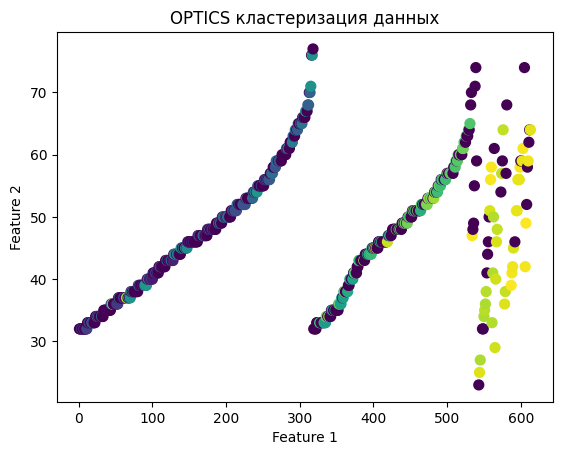

Силуэтовская оценка: -0.26
Индекс Дэвиса-Болдуина: 1.66
Индекс Калински-Харабаса: 4.25


In [16]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=2)
predicted_labels = optics.fit_predict(X)

# Визуализация кластеров (в этом случае, используем только первые два признака для визуализации)
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=50)
plt.title('OPTICS кластеризация данных')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Вычисление метрик качества
silhouette_avg = silhouette_score(X, predicted_labels)
davies_bouldin = davies_bouldin_score(X, predicted_labels)
calinski_harabasz = calinski_harabasz_score(X, predicted_labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")


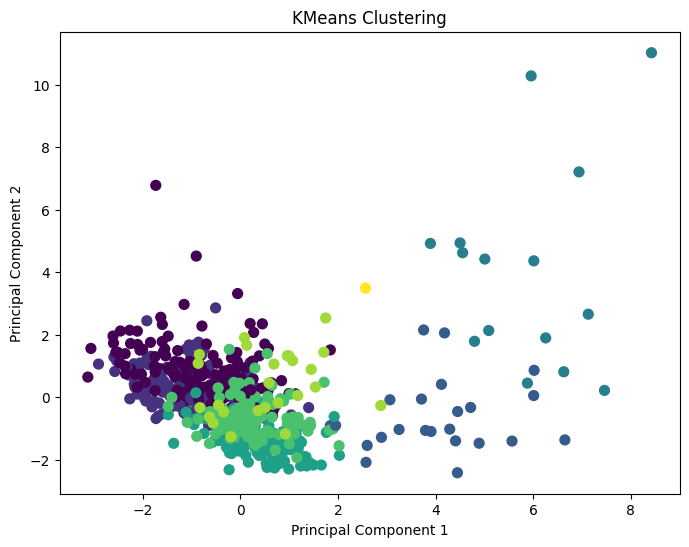

KMeans метрики:
 - Силуэтовская оценка : 0.15
 - Индекс Дэвиса-Болдуина : 1.65
 - Индекс Калински-Харабаса : 70.64


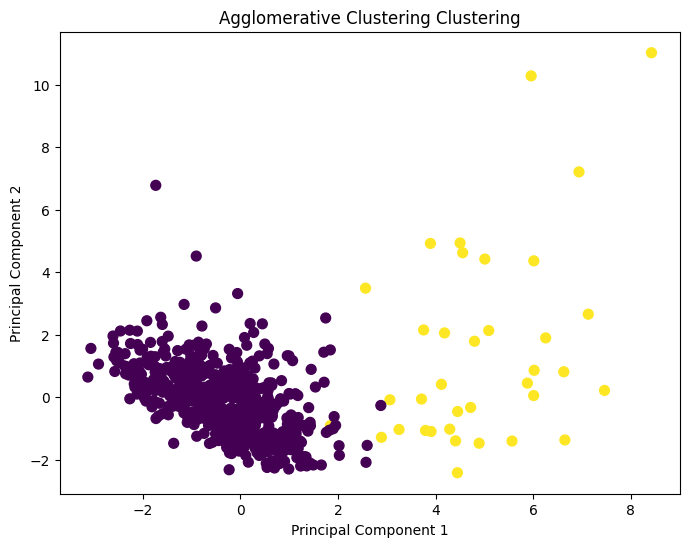

Agglomerative Clustering метрики:
 - Силуэтовская оценка : 0.55
 - Индекс Дэвиса-Болдуина : 1.72
 - Индекс Калински-Харабаса : 95.06


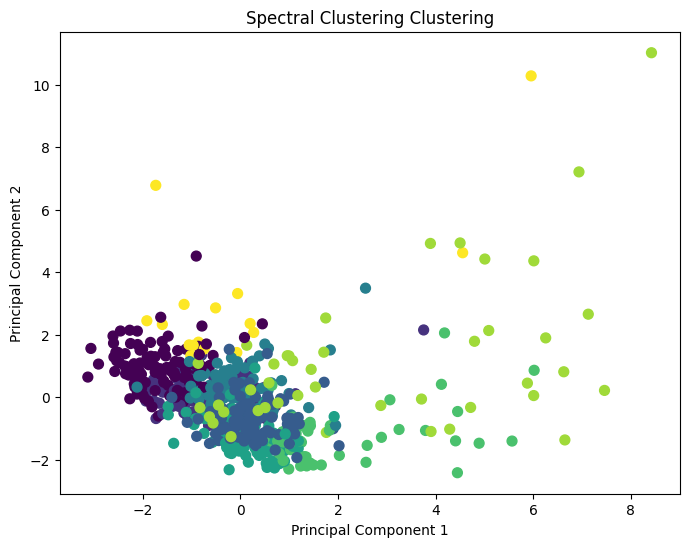

Spectral Clustering метрики:
 - Силуэтовская оценка : 0.13
 - Индекс Дэвиса-Болдуина : 1.71
 - Индекс Калински-Харабаса : 51.80


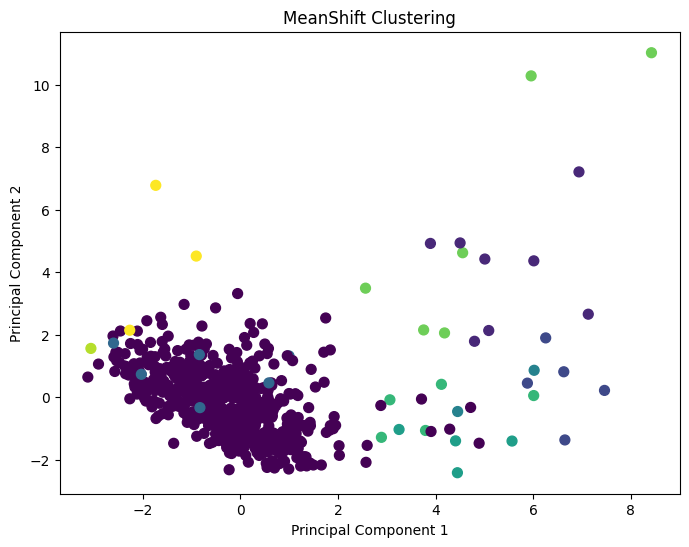

MeanShift метрики:
 - Силуэтовская оценка : 0.23
 - Индекс Дэвиса-Болдуина : 1.60
 - Индекс Калински-Харабаса : 27.14


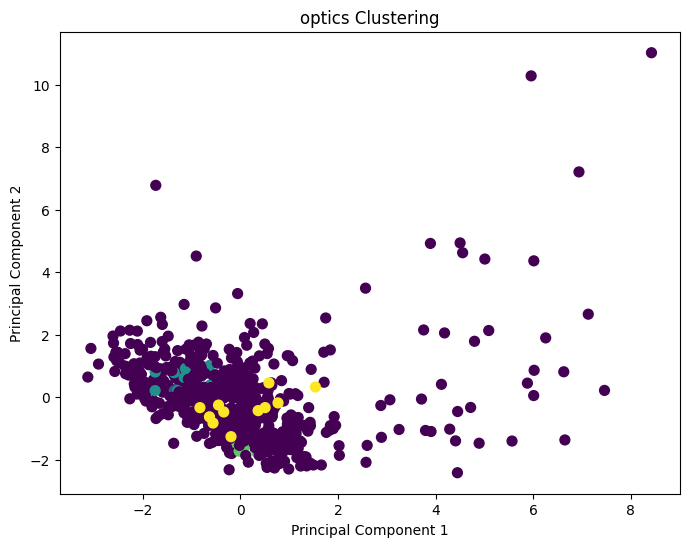

optics метрики:
 - Силуэтовская оценка : -0.34
 - Индекс Дэвиса-Болдуина : 2.20
 - Индекс Калински-Харабаса : 3.01

Лучший алгоритм по Silhouette: Agglomerative Clustering с оценкой 0.55

Лучший алгоритм по индексу 'Дэвиса-Болдуина': MeanShift
Значение: 1.60
Индекс в исходных результатах: 3

Лучший алгоритм по индексу 'Калински-Харабаса': Agglomerative Clustering
Значение: 95.06
Индекс в исходных результатах: 1


In [17]:
def cluster_and_evaluate(df, clustering_algorithm, algorithm_name='Algorithm'):
    X = df.values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    predicted_labels = clustering_algorithm.fit_predict(X_scaled)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, s=50, cmap='viridis')
    plt.title(f"{algorithm_name} Clustering")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()
    silhouette_avg = silhouette_score(X_scaled, predicted_labels)
    davies_bouldin = davies_bouldin_score(X_scaled, predicted_labels)
    calinski_harabasz = calinski_harabasz_score(X_scaled, predicted_labels)
    print(f"{algorithm_name} метрики:")
    print(f" - Силуэтовская оценка : {silhouette_avg:.2f}")
    print(f" - Индекс Дэвиса-Болдуина : {davies_bouldin:.2f}")
    print(f" - Индекс Калински-Харабаса : {calinski_harabasz:.2f}")
    return {
        'algorithm': algorithm_name,
        'silhouette': silhouette_avg,
        'davies_bouldin': davies_bouldin,
        'calinski_harabasz': calinski_harabasz
    }

kmeans = KMeans(random_state=42)
results = []
results.append(cluster_and_evaluate(df, kmeans, 'KMeans'))

agglo = AgglomerativeClustering()
results.append(cluster_and_evaluate(df, agglo, 'Agglomerative Clustering'))

spectral = SpectralClustering(affinity='nearest_neighbors', random_state=42)
results.append(cluster_and_evaluate(df, spectral, 'Spectral Clustering'))

mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
results.append(cluster_and_evaluate(df, mean_shift, 'MeanShift'))

optics = OPTICS()
results.append(cluster_and_evaluate(df, optics, 'optics'))

# Анализировать результаты:
best = max(results, key=lambda x: x['silhouette'])
print(f"\nЛучший алгоритм по Silhouette: {best['algorithm']} с оценкой {best['silhouette']:.2f}")

def get_best_algorithms_by_indices(results):
    # Фильтр результатов, исключая те без значения метрик (None)
    filtered_bau = [res for res in results if res['davies_bouldin'] is not None]
    filtered_ch = [res for res in results if res['calinski_harabasz'] is not None]

    # Проверка наличия данных
    if not filtered_bau:
        print("Нет доступных результатов для индекса 'Дэвиса-Болдуина'.")
        best_bau_idx = None
        best_bau_res = None
    else:
        # Лучший по минимальному индексу Дэвиса-Болдуина
        best_bau_idx_filtered = min(range(len(filtered_bau)), key=lambda i: filtered_bau[i]['davies_bouldin'])
        best_bau_res = filtered_bau[best_bau_idx_filtered]
        best_bau_idx = results.index(best_bau_res)

    if not filtered_ch:
        print("Нет доступных результатов для индекса 'Калински-Харабаса'.")
        best_ch_idx = None
        best_ch_res = None
    else:
        # Лучший по максимальному индексу Калински-Харабаса
        best_ch_idx_filtered = max(range(len(filtered_ch)), key=lambda i: filtered_ch[i]['calinski_harabasz'])
        best_ch_res = filtered_ch[best_ch_idx_filtered]
        best_ch_idx = results.index(best_ch_res)

    # Выводим результаты
    if best_bau_res:
        print(f"\nЛучший алгоритм по индексу 'Дэвиса-Болдуина': {best_bau_res['algorithm']}")
        print(f"Значение: {best_bau_res['davies_bouldin']:.2f}")
        print(f"Индекс в исходных результатах: {best_bau_idx}")

    if best_ch_res:
        print(f"\nЛучший алгоритм по индексу 'Калински-Харабаса': {best_ch_res['algorithm']}")
        print(f"Значение: {best_ch_res['calinski_harabasz']:.2f}")
        print(f"Индекс в исходных результатах: {best_ch_idx}")


get_best_algorithms_by_indices(results)